In [1]:
import selenium
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options  
from urllib.request import urlopen
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm_notebook
import ailabtools

In [2]:
def get_url(result):
    if result.value_of_css_property('background-image') != 'none':
        return result.value_of_css_property('background-image')
    else:
        return get_url(result.find_element_by_tag_name('div'))
    
def get_parsed_url(css_val):
    css_val = css_val.replace('url("', "")
    url = css_val.replace('")', "")
    return url

def download_image(url, save_folder=None):
    img = np.array(Image.open(urlopen(url)))
    
    if save_folder != None:
        img = img[:, :, ::-1]
        cv2.imwrite(os.path.join(save_folder, url.split('/')[-1]) + '.jpg', 
                   img)
    return img

In [3]:
destination_url = 'https://shopee.vn/'
chrome_options = Options()  
chrome_options.add_argument("--headless")  

driver = webdriver.Chrome(executable_path='./driver/chromedriver', options=chrome_options)
# driver.execute_script("document.body.style.zoom='0.2") # 0.2

In [4]:
keywords = [
#     'thời trang nam',
#     'đồng hồ đeo tay',
#     'điện thoại',
#     'giày dép nam',
#     'giày dép nữ',
#     'mũ bảo hiểm',
#     'túi xách nữ',
#     'ba lô nam',
#     'ví nữ', 
#     'nồi cơm điện',
#     'son môi',
#     'áo khoác'
#     'bàn phím máy tính'
#     'vali'
#     "chén sứ",
#     "ly sứ"
#     "nồi nhôm"
    "khăn choàng cổ"
]

In [5]:
total_images = 0

In [7]:
for kw in keywords:
    driver.get(destination_url)
    time.sleep(1)
    elem = driver.find_element_by_class_name("shopee-searchbar-input__input")
    elem.send_keys(kw)
    elem.send_keys(Keys.ENTER)
    time.sleep(2)
    
    
    #===============================================================
    total = driver.find_element_by_class_name('shopee-mini-page-controller__total')
    total = int(total.text)
    
    save_folder='/media/congvm/DATA/shopee_data/{}'.format(kw)
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)    
    
    for i in range(total):
        results = driver.find_elements_by_class_name("shopee-search-item-result__item")
        successful = 0
        for idx, item in enumerate(tqdm_notebook(results)):
            try:
                url_ccs_val = get_url(item)
                _ = download_image(get_parsed_url(url_ccs_val), save_folder=save_folder)
                successful += 1
                total_images += successful
                
                if idx % 10 == 0:
                    step = 700*(idx//10)
                    driver.execute_script("window.scrollTo({},{});".format(step, step+700))
#                     time.sleep(1)
            except:
                pass
        print('Downloaded: {}/{}'.format(successful, len(results)))
        results.clear()
        next_button = driver.find_element_by_class_name('shopee-mini-page-controller__next-btn')
        next_button.click()
        time.sleep(1)


Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/46



Downloaded: 21/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 0/0



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 5/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 21/50



Downloaded: 0/0



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/49



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50



Downloaded: 22/50


In [1]:
ailabtools.ailab_multiprocessing.pool_worker(target=download, inputs=keywords, num_worker=1)

NameError: name 'ailabtools' is not defined

In [7]:
txt = 'url("https://cf.shopee.vn/file/a86c994e14e8b76e7023550e4704a183_tn")'

In [8]:
get_parsed_url(txt)

'https://cf.shopee.vn/file/a86c994e14e8b76e7023550e4704a183_tn'

In [9]:
img = download_image(get_parsed_url(txt), save_folder='.')

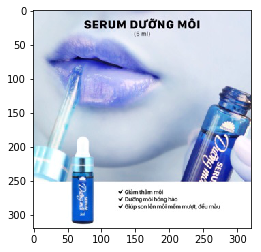

In [10]:
plt.imshow(img)